In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from equities_util import stock_data, stock_comp, potential_invests

In [2]:
potential_invests

['AAPL', 'IBM', 'CRWD']

In [3]:
stock = stock_data('AAPL', '2021-02-01', '2021-05-10')

[*********************100%***********************]  1 of 1 completed


In [4]:
stock.get_sharpe_ratio(daily=False)

-0.2138739013207185

In [98]:
stock.data

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-05-01,71.562500,74.750000,71.462502,72.267502,70.858673,240616800.0,NaN
2020-05-04,72.292503,73.422501,71.580002,73.290001,71.861244,133568000.0,0.014149
2020-05-05,73.764999,75.250000,73.614998,74.389999,72.939804,147751200.0,0.015009
2020-05-06,75.114998,75.809998,74.717499,75.157501,73.692360,142333600.0,0.010317
2020-05-07,75.805000,76.292503,75.492500,75.934998,74.454681,115215200.0,0.010345
...,...,...,...,...,...,...,...
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300.0,-0.017929
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600.0,0.019245
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100.0,-0.017653


<AxesSubplot:xlabel='Date'>

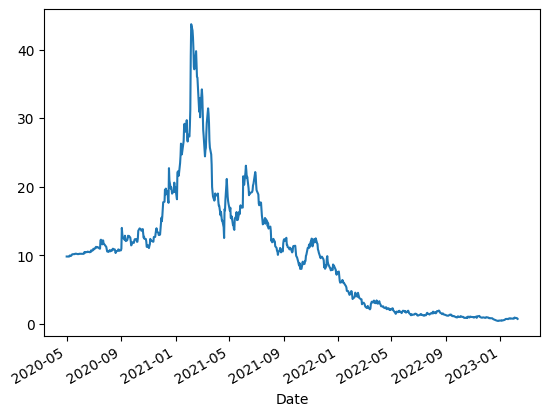

In [113]:
stock.data['Adj Close'].plot()

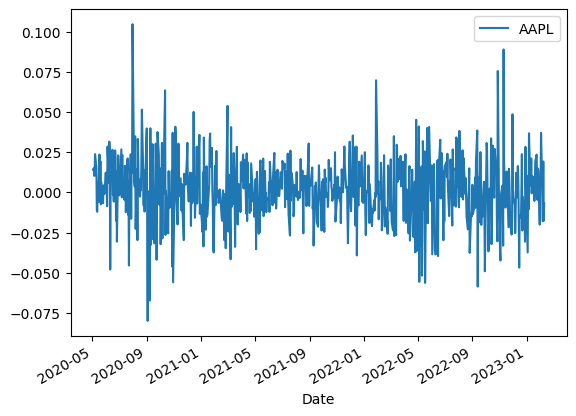

In [100]:
stock.plot_daily_returns()

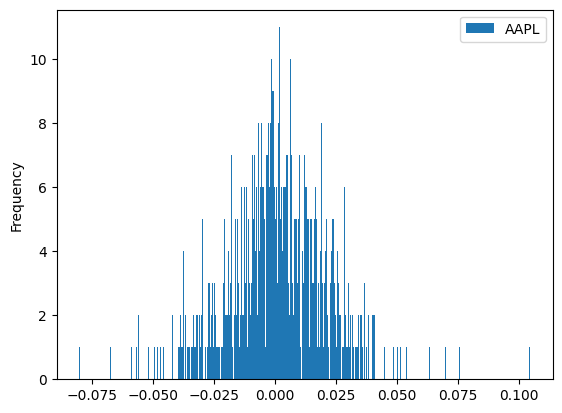

In [101]:
stock.plot_daily_returns(kind='hist', bins=500)

In [5]:
stock.get_sharpe_ratio()

-0.013472789400518806

In [103]:
stock.get_sharpe_ratio(daily=False)

1.0016752658441346

In [104]:
stock.get_sortino_ratio(daily=False)

1.532344702972717

In [105]:
stock.get_probabalistic_sharpe_ratio(daily=False)

15.79040324719027

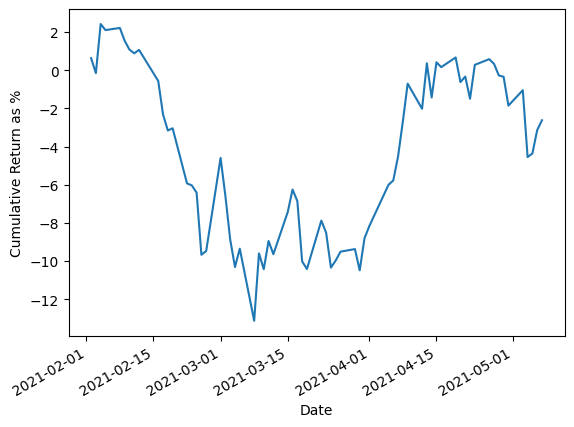

In [6]:
stock.plot_cumulative_daily_return_rate()

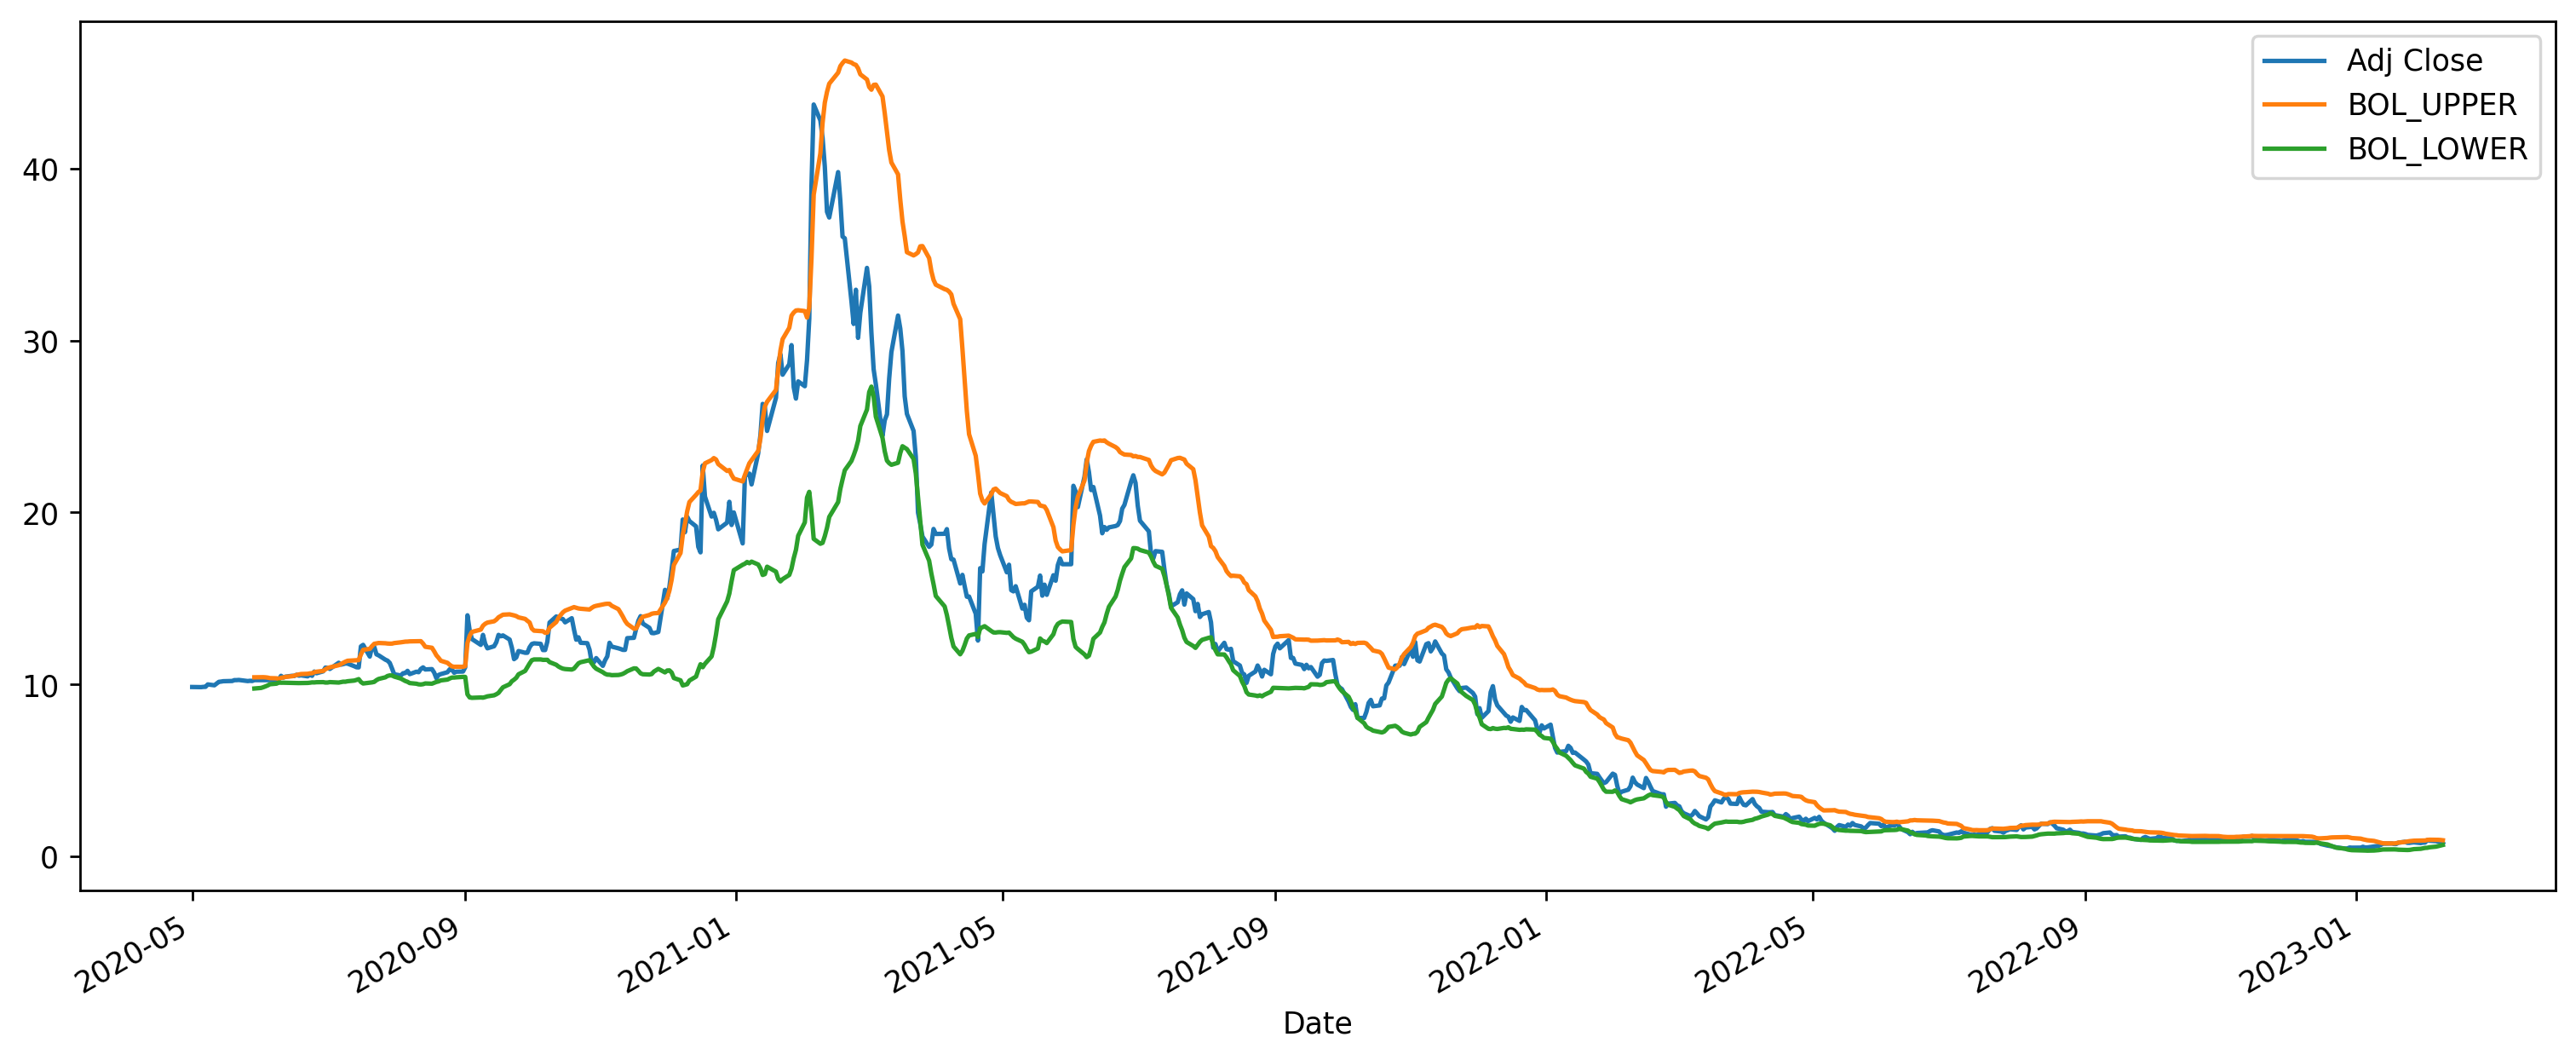

In [114]:
plt.figure(figsize=(15,6), dpi=250)
stock.plot_bollinger_bands(n=20)

In [117]:
stock.get_sharpe_ratio(daily=False)

-0.4862645829635735

In [108]:
tickers = ['AAPL', 'COST', 'MSFT', 'CRM', 'TSLA']
start_date = '2019-01-01'
end_date = '2023-02-01'

comp = stock_comp(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [89]:
comp.get_ticker_dict()

{'AAPL': <equities_util.stock_data at 0x7fe348265cd0>,
 'COST': <equities_util.stock_data at 0x7fe3680bbb10>,
 'MSFT': <equities_util.stock_data at 0x7fe3a896db50>,
 'CRM': <equities_util.stock_data at 0x7fe34828a450>,
 'TSLA': <equities_util.stock_data at 0x7fe3482655d0>}

In [90]:
comp.get_daily_returns().head()

,AAPL,COST,MSFT,CRM,TSLA
Date,,,,,
2019-01-03,-0.099607,-0.021195,-0.036788,-0.037993,-0.031472
2019-01-04,0.042689,0.029039,0.046509,0.057976,0.057697
2019-01-07,-0.002226,0.003685,0.001275,0.030878,0.054361
2019-01-08,0.019063,0.007488,0.007251,0.024610,0.001164
2019-01-09,0.016982,0.006473,0.014299,0.001853,0.009483


<Figure size 2800x800 with 0 Axes>

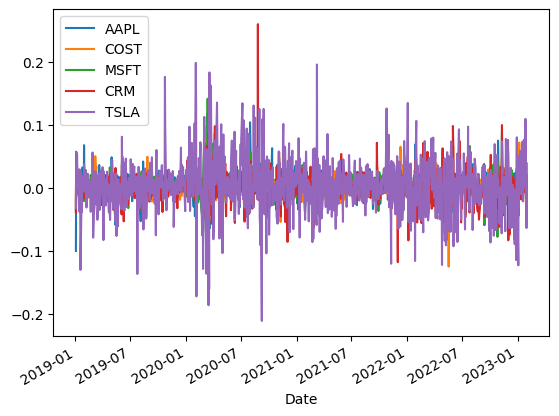

In [91]:
plt.figure(figsize =(14,4), dpi=200)
comp.plot_daily_returns(alpha=0.25)

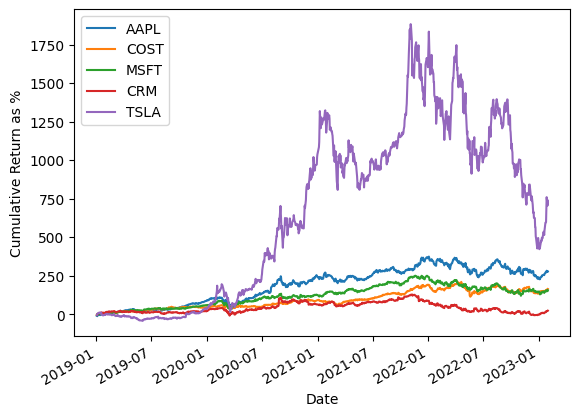

In [92]:
comp.plot_cumulative_daily_returns()

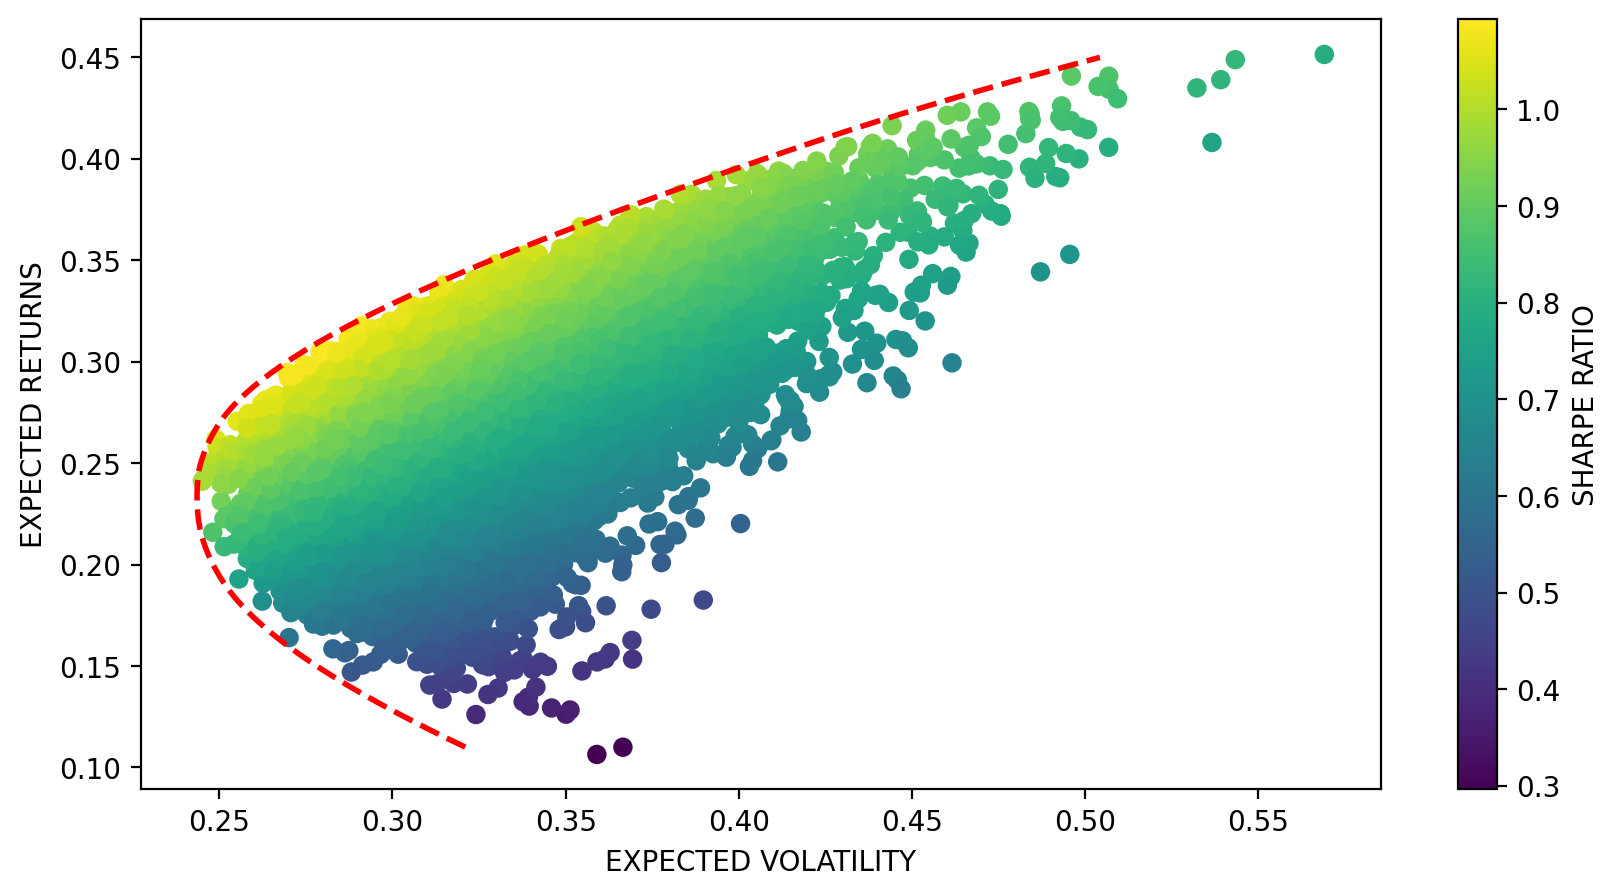

In [93]:
comp.run_monte_carlo_simulation(n_simulations = 20000, efficient_frontier=True)

In [94]:
optimal_weights = comp.minimization_search_optimal_weights()['x']
print(list(zip(comp.tickers, optimal_weights)))

[('AAPL', 0.29626994364860015), ('COST', 0.574787305091643), ('MSFT', 1.4392783839745071e-16), ('CRM', 4.178515172759134e-16), ('TSLA', 0.12894275125975627)]
